Chapter 7<br/>
< Linear Regression with GD & Implementation >
===============================


### 1. Load Dataset

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
raw_X = df['X'].values.reshape(-1, 1)
y = df['Y'].values

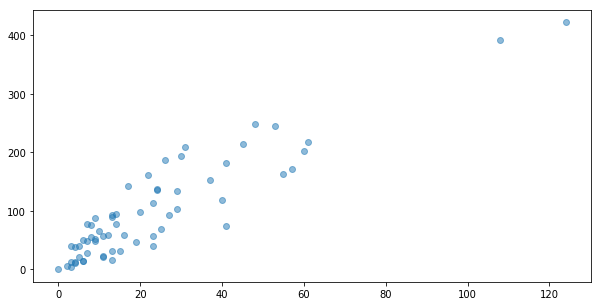

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

In [5]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]), array([ 392.5,   46.2,   15.7,  422.2,  119.4]))

In [6]:
np.ones((len(raw_X), 1))[:3]

array([[ 1.],
       [ 1.],
       [ 1.]])

In [7]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis = 1)
X[:5]

array([[   1.,  108.],
       [   1.,   19.],
       [   1.,   13.],
       [   1.,  124.],
       [   1.,   40.]])

In [8]:
w = np.random.normal((2, 1)) 
w

array([ 2.14576313,  1.67016255])

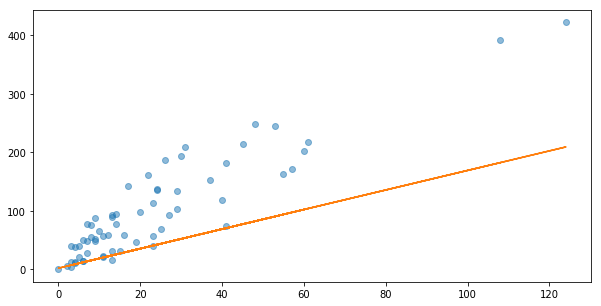

In [9]:
plt.figure(figsize=(10, 5))
y_predict = np.dot(X, w)
plt.plot(raw_X, y, 'o', alpha = 0.5)
plt.plot(raw_X, y_predict)

### 2. Hypothesis and Cost function

In [10]:
def hypothesis_function(X, theta) :
    return X.dot(theta)

In [11]:
h = hypothesis_function(X, w)

In [12]:
def cost_function(h, y) :
    return (1 / (2 * len(y))) * np.sum((h - y) ** 2)

In [13]:
h = hypothesis_function(X, w)
cost_function(h, y)

3110.8461811986094

### 3. Gradient Descent

In [14]:
def gradient_descent(X, y, w, alpha, iterations) :
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])
        
        if i % 10 == 0 :
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

### 4. Do Linear regression with GD

In [15]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print('theta:', theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [ 19.88101865   3.41627358]
cost: 625.374219871


In [16]:
theta_list[:10]

[[2.1457631262267864, 1.6701625523288999],
 [2.2035499890845185, 3.929505812608141],
 [2.2904423173201276, 3.796095842563449],
 [2.379720948201876, 3.794168105201108],
 [2.468549361371593, 3.7922500891069535],
 [2.5569298272044616, 3.7903417452580945],
 [2.6448646046265334, 3.788443024878961],
 [2.73235594117246, 3.78655387943995],
 [2.8194060730429404, 3.7846742606561845],
 [2.9060172251618734, 3.7828041204862823]]

In [17]:
theta_list = np.array(theta_list)

In [18]:
cost_list[:5]

[3110.8461811986094,
 714.60350755110994,
 704.61744762045987,
 703.8202084545884,
 703.03098971137911]

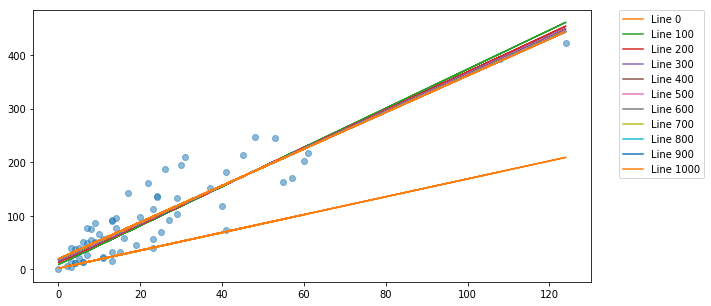

In [19]:
plt.figure(figsize = (10, 5))

y_predict_step = np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X, y, 'o', alpha = 0.5)
for i in range (0, len(cost_list), 100) :
    plt.plot(raw_X, y_predict_step[:, i], label = 'Line %d' % i)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

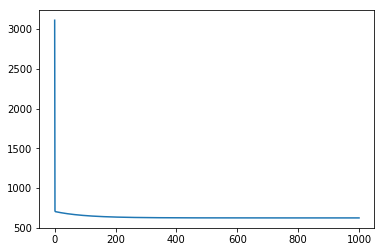

In [20]:
plt.plot(range(len(cost_list)), cost_list)

In [21]:
th0 = theta_list[:, 0]
th1 = theta_list[:, 1]
TH0, TH1 = np.meshgrid(th0, th1)

In [22]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 6 text.Text objects>

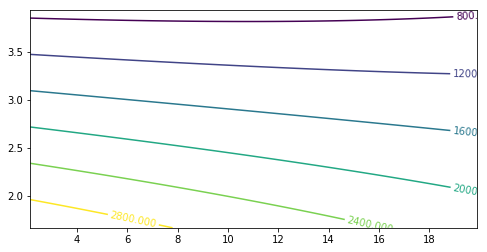

In [23]:
plt.figure(figsize = (8, 4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline = True, fontsize = 10, inline_spacing = 2)

In [24]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([cost_function(y, hypothesis_function(X, theta))
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


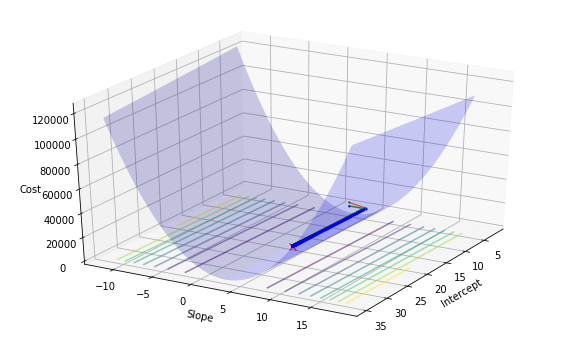

In [25]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(M, B, Z,
                rstride = 1, cstride = 1,
                color='b', alpha = 0.2)
ax.contour(M, B, Z, 10,
           color = 'b', alpha = 0.5,
           offset = 0, stride = 30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev = 30., azim = 30)

ax.plot([theta[0]], [theta[1]], [cost_list[-1]],
        markerfacecolor = 'r', markeredgecolor = 'r', 
        marker = 'x', markersize = 7)

ax.plot(theta_list[:, 0], theta_list[:, 1],
        cost_list, markerfacecolor = 'g',
        markeredgecolor = 'g', marker='o', markersize=1)

ax.plot(theta_list[:, 0], theta_list[:, 1],
        0 , markerfacecolor = 'b', markeredgecolor = 'b',
        marker = '.', markersize = 2)